In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import sys 
from os import path as pt
import numpy as np
import matplotlib.pyplot as plt
import ot
from tqdm import tqdm
import random
from utils import Lmatrix2paths, adapted_empirical_measure, adapted_wasserstein_squared, quantization, nested

np.random.seed(0)
random.seed(0)
verbose = True

# Markovian

mu
Cholesky:
[[1 0 0]
 [1 2 0]
 [1 2 1]]
Covariance:
[[1 1 1]
 [1 5 5]
 [1 5 6]]
nu
Cholesky:
[[1 0 0]
 [2 1 0]
 [2 1 2]]
Covariance:
[[1 2 2]
 [2 5 5]
 [2 5 9]]


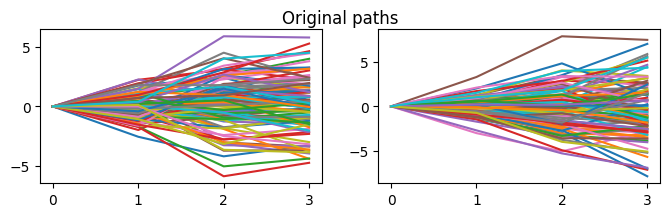

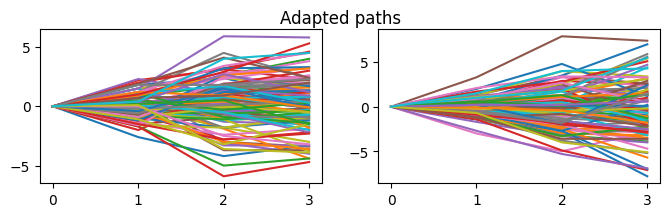

In [2]:
# Markovian
n_sample = 20000
normalize = False

print("mu")
L = np.array([[1, 0, 0], [1, 2, 0], [1, 2, 1]])
X,A = Lmatrix2paths(L, n_sample)

print("nu")
M = np.array([[1, 0, 0], [2, 1, 0], [2, 1, 2]])
Y,B = Lmatrix2paths(M, n_sample)

if verbose:
    fig, ax = plt.subplots(1, 2, figsize=[8, 2])
    ax[0].plot(X[:,:100])
    ax[1].plot(Y[:,:100])
    plt.suptitle('Original paths')
    plt.show()

# Grid projection of k-mean projection
adaptedX = adapted_empirical_measure(X, delta_n = 0.1)
adaptedY = adapted_empirical_measure(Y, delta_n = 0.1)

if verbose:
    fig, ax = plt.subplots(1,2, figsize=[8, 2])
    ax[0].plot(adaptedX[:,:100])
    ax[1].plot(adaptedY[:,:100])
    plt.suptitle('Adapted paths')
    plt.show()

In [3]:
q2v, _, mu_x, nu_y, _, v2q_x, _, v2q_y = quantization(adaptedX, adaptedY, markovian=True)
AW_2square = nested(mu_x, nu_y, v2q_x, v2q_y, q2v, markovian=True)
dist_bench = adapted_wasserstein_squared(A, B)
print("Theoretical AW_2^2: ", dist_bench)
print("Numerical AW_2^2: ", AW_2square)

Number of distint values in global quantization:  210
Number of condition subpaths of mu_x
Time 0: 1
Time 1: 75
Time 2: 166
Number of condition subpaths of nu_y
Time 0: 1
Time 1: 76
Time 2: 162


100%|██████████| 3/3 [00:06<00:00,  2.08s/it]

Theoretical AW_2^2:  5.0
Numerical AW_2^2:  4.985159159665507


# Non-Markovian

mu
Cholesky:
[[1 0 0]
 [2 4 0]
 [3 2 1]]
Covariance:
[[ 1  2  3]
 [ 2 20 14]
 [ 3 14 14]]
nu
Cholesky:
[[1 0 0]
 [2 3 0]
 [3 1 2]]
Covariance:
[[ 1  2  3]
 [ 2 13  9]
 [ 3  9 14]]


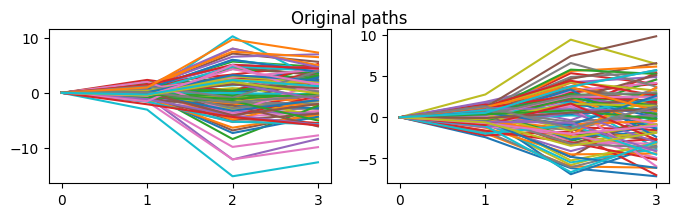

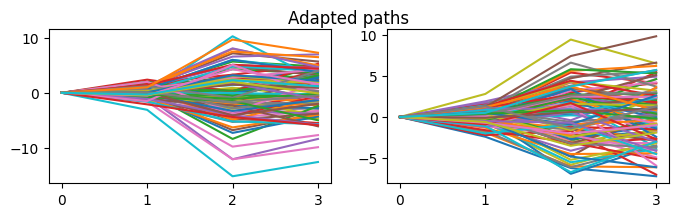

In [4]:
# Non-Markovian
n_sample = 500
normalize = False

print("mu")
L = np.array([[1, 0, 0], [2, 4, 0], [3, 2, 1]])
X,A = Lmatrix2paths(L, n_sample)

print("nu")
M = np.array([[1, 0, 0], [2, 3, 0], [3, 1, 2]])
Y,B = Lmatrix2paths(M, n_sample)

if verbose:
    fig, ax = plt.subplots(1, 2, figsize=[8, 2])
    ax[0].plot(X[:,:100])
    ax[1].plot(Y[:,:100])
    plt.suptitle('Original paths')
    plt.show()

# Grid projection of k-mean projection
adaptedX = adapted_empirical_measure(X, delta_n = 0.1)
adaptedY = adapted_empirical_measure(Y, delta_n = 0.1)

if verbose:
    fig, ax = plt.subplots(1,2, figsize=[8, 2])
    ax[0].plot(adaptedX[:,:100])
    ax[1].plot(adaptedY[:,:100])
    plt.suptitle('Adapted paths')
    plt.show()

In [5]:
q2v, _, mu_x, nu_y, _, v2q_x, _, v2q_y = quantization(adaptedX, adaptedY, markovian=False)
AW_2square = nested(mu_x, nu_y, v2q_x, v2q_y, q2v, markovian=False)
dist_bench = adapted_wasserstein_squared(A, B)
print("Theoretical AW_2^2: ", dist_bench)
print("Numerical AW_2^2: ", AW_2square)

Number of distint values in global quantization:  208
Number of condition subpaths of mu_x
Time 0: 1
Time 1: 55
Time 2: 475
Number of condition subpaths of nu_y
Time 0: 1
Time 1: 53
Time 2: 472


100%|██████████| 3/3 [00:16<00:00,  5.35s/it]

Theoretical AW_2^2:  3.0
Numerical AW_2^2:  8.387129226492194
